In [1]:
import pandas as pd 
from datetime import datetime , timedelta
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 

%matplotlib inline

import warnings 

warnings.filterwarnings('ignore')
#importing all necessary libraries required for Climate Change project


In [2]:
#importing the file 
df=pd.read_csv("GlobalLandTemperaturesByState_SplitDate.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month,Day
0,1855-05-01,25.544,1.171,Acre,Brazil,1855,5,1
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,6,1
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,7,1
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,8,1
4,1855-09-01,25.675,1.014,Acre,Brazil,1855,9,1


In [3]:
del df['dt']

In [4]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month,Day
0,25.544,1.171,Acre,Brazil,1855,5,1
1,24.228,1.103,Acre,Brazil,1855,6,1
2,24.371,1.044,Acre,Brazil,1855,7,1
3,25.427,1.073,Acre,Brazil,1855,8,1
4,25.675,1.014,Acre,Brazil,1855,9,1


In [5]:
df_new=df.rename(columns={'AverageTemperature':'Avg_Temp','AverageTemperatureUncertainty':'Confidence_interval_temp'})
df_new.head()

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
0,25.544,1.171,Acre,Brazil,1855,5,1
1,24.228,1.103,Acre,Brazil,1855,6,1
2,24.371,1.044,Acre,Brazil,1855,7,1
3,25.427,1.073,Acre,Brazil,1855,8,1
4,25.675,1.014,Acre,Brazil,1855,9,1


In [6]:
df.dtypes

AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
Year                               int64
Month                              int64
Day                                int64
dtype: object

In [7]:
latest_difference = df_new[['Country','Avg_Temp']].groupby(['Country']).mean().sort_values('Avg_Temp')
latest_difference

,Avg_Temp
Country,
Canada,-1.321079
Russia,1.808555
United States,10.701555
China,11.206830
Australia,17.664222
India,22.534576
Brazil,23.770601


In [8]:
df_new.columns

Index(['Avg_Temp', 'Confidence_interval_temp', 'State', 'Country', 'Year',
       'Month', 'Day'],
      dtype='object')

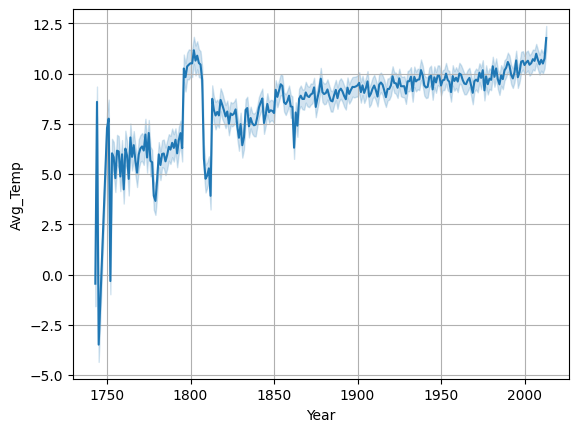

In [9]:
sns.lineplot(x='Year',y='Avg_Temp',data=df_new)
plt.grid(True)
plt.show()

In [10]:
df_russ_data=df_new[(df_new['Country'] == 'Russia')]
df_russ_data.head(100)

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
1901,4.537,2.943,Adygey,Russia,1743,11,1
1902,NaN,NaN,Adygey,Russia,1743,12,1
1903,NaN,NaN,Adygey,Russia,1744,1,1
1904,NaN,NaN,Adygey,Russia,1744,2,1
1905,NaN,NaN,Adygey,Russia,1744,3,1
...,...,...,...,...,...,...,...
1996,NaN,NaN,Adygey,Russia,1751,10,1
1997,NaN,NaN,Adygey,Russia,1751,11,1
1998,NaN,NaN,Adygey,Russia,1751,12,1
1999,-3.734,3.025,Adygey,Russia,1752,1,1


In [11]:
df_russ_data['State']

1901      Adygey
1902      Adygey
1903      Adygey
1904      Adygey
1905      Adygey
           ...  
638997    Yevrey
638998    Yevrey
638999    Yevrey
639000    Yevrey
639001    Yevrey
Name: State, Length: 254972, dtype: object

In [12]:
df_russ_data=df_russ_data[(df_russ_data['State'] == 'Adygey')]
df_russ_data.head(100)

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
1901,4.537,2.943,Adygey,Russia,1743,11,1
1902,NaN,NaN,Adygey,Russia,1743,12,1
1903,NaN,NaN,Adygey,Russia,1744,1,1
1904,NaN,NaN,Adygey,Russia,1744,2,1
1905,NaN,NaN,Adygey,Russia,1744,3,1
...,...,...,...,...,...,...,...
1996,NaN,NaN,Adygey,Russia,1751,10,1
1997,NaN,NaN,Adygey,Russia,1751,11,1
1998,NaN,NaN,Adygey,Russia,1751,12,1
1999,-3.734,3.025,Adygey,Russia,1752,1,1


In [13]:
df_russ_data=df_russ_data[(df_russ_data['Year'] >=1930)]
df_russ_data.head(100)

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
4135,-0.362,0.618,Adygey,Russia,1930,1,1
4136,-1.285,0.634,Adygey,Russia,1930,2,1
4137,5.822,0.785,Adygey,Russia,1930,3,1
4138,10.203,0.265,Adygey,Russia,1930,4,1
4139,15.199,0.232,Adygey,Russia,1930,5,1
...,...,...,...,...,...,...,...
4230,5.183,0.727,Adygey,Russia,1937,12,1
4231,0.976,0.721,Adygey,Russia,1938,1,1
4232,-0.573,0.636,Adygey,Russia,1938,2,1
4233,1.902,0.394,Adygey,Russia,1938,3,1


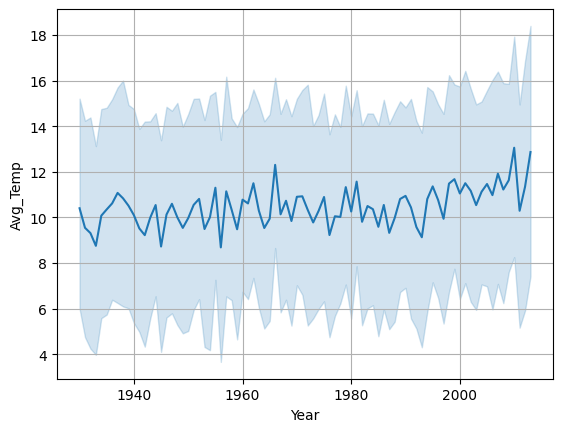

In [14]:
plt.Figure(figsize=(9,4))
sns.lineplot(x='Year', y='Avg_Temp',data=df_russ_data)
plt.grid(True)
plt.show()

In [15]:
mean_temp_russ=df_russ_data['Avg_Temp'].mean()
mean_temp_russ

10.465065737051793

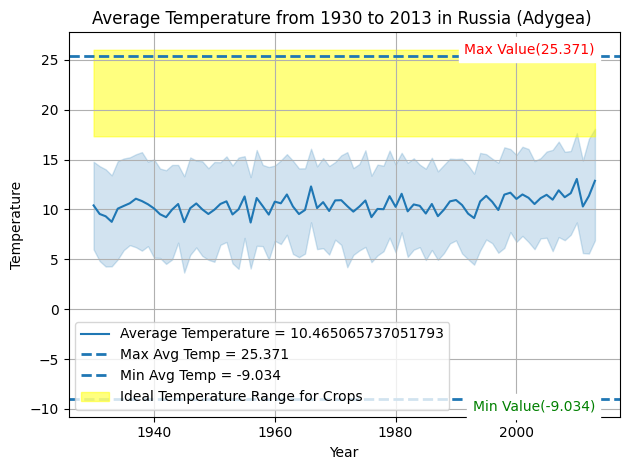

In [16]:
max_temp_russ=df_russ_data['Avg_Temp'].max()
min_temp_russ=df_russ_data['Avg_Temp'].min()

sns.lineplot(x='Year',y='Avg_Temp',data=df_russ_data,alpha=1.0,label=f"Average Temperature = {df_russ_data['Avg_Temp'].mean()}")

plt.axhline(y=max_temp_russ, linestyle = '--', linewidth = 2,label =f'Max Avg Temp = {max_temp_russ} ')
plt.axhline(y=min_temp_russ, linestyle = '--', linewidth = 2 , label = f'Min Avg Temp = {min_temp_russ}')

plt.text(
    x=df_russ_data['Year'].max(),
    y=max_temp_russ,
    s=f'Max Value({max_temp_russ})',
    color='red',
    va='bottom',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
    
    
)
plt.text(
    x=df_russ_data['Year'].max(),
    y=min_temp_russ,
    s=f'Min Value({min_temp_russ})',
    color='green',
    va='top',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
    
)

plt.fill_between(df_russ_data['Year'],17.33,26,color='yellow', alpha = 0.5 ,label='Ideal Temperature Range for Crops')

plt.title("Average Temperature from 1930 to 2013 in Russia (Adygea) ")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='lower left')


plt.tight_layout()
plt.grid(True)
plt.show()


In [17]:
df_chn_data=df_new[(df_new['Country'] == 'China')]
df_chn_data.head(n=100) 

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
29935,0.581,2.745,Anhui,China,1841,1,1
29936,2.716,1.832,Anhui,China,1841,2,1
29937,6.871,1.852,Anhui,China,1841,3,1
29938,13.748,2.200,Anhui,China,1841,4,1
29939,19.662,1.580,Anhui,China,1841,5,1
...,...,...,...,...,...,...,...
30030,4.683,1.293,Anhui,China,1848,12,1
30031,2.159,1.127,Anhui,China,1849,1,1
30032,5.874,1.622,Anhui,China,1849,2,1
30033,9.316,1.900,Anhui,China,1849,3,1


In [18]:
df_chn_data=df_chn_data[(df_chn_data['Year'])>=1930]
df_chn_data

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
31003,-1.590,0.578,Anhui,China,1930,1,1
31004,5.505,0.373,Anhui,China,1930,2,1
31005,10.100,0.474,Anhui,China,1930,3,1
31006,14.555,0.376,Anhui,China,1930,4,1
31007,21.080,0.370,Anhui,China,1930,5,1
...,...,...,...,...,...,...,...
645670,21.634,0.578,Zhejiang,China,2013,5,1
645671,24.679,0.596,Zhejiang,China,2013,6,1
645672,29.272,1.340,Zhejiang,China,2013,7,1
645673,29.202,0.869,Zhejiang,China,2013,8,1


In [19]:
df_chn_data=df_chn_data[(df_chn_data['State'] == 'Zhejiang')]
df_chn_data

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
644670,2.187,1.015,Zhejiang,China,1930,1,1
644671,7.459,0.406,Zhejiang,China,1930,2,1
644672,11.121,0.313,Zhejiang,China,1930,3,1
644673,16.155,0.306,Zhejiang,China,1930,4,1
644674,20.971,0.471,Zhejiang,China,1930,5,1
...,...,...,...,...,...,...,...
645670,21.634,0.578,Zhejiang,China,2013,5,1
645671,24.679,0.596,Zhejiang,China,2013,6,1
645672,29.272,1.340,Zhejiang,China,2013,7,1
645673,29.202,0.869,Zhejiang,China,2013,8,1


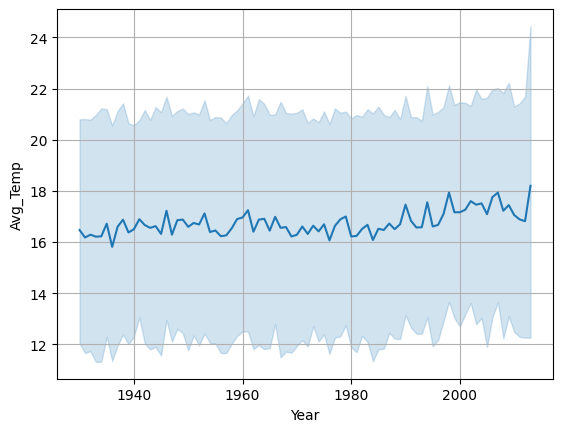

In [20]:
plt.Figure(figsize=(9,4))
sns.lineplot(x='Year',y='Avg_Temp',data=df_chn_data)
plt.grid(True)
plt.show()

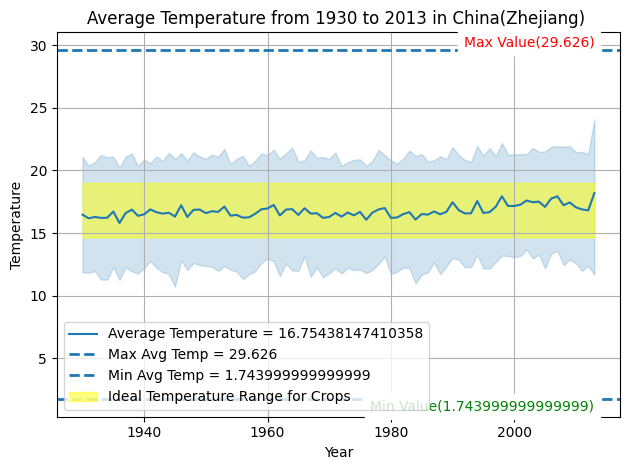

In [21]:
max_temp_chn=df_chn_data['Avg_Temp'].max()
min_temp_chn=df_chn_data['Avg_Temp'].min()

sns.lineplot(x='Year',y='Avg_Temp',data=df_chn_data,alpha=1.0,label=f"Average Temperature = {df_chn_data['Avg_Temp'].mean()}")

plt.axhline(y=max_temp_chn, linestyle = '--', linewidth = 2,label =f'Max Avg Temp = {max_temp_chn} ')
plt.axhline(y=min_temp_chn, linestyle = '--', linewidth = 2 , label = f'Min Avg Temp = {min_temp_chn}')

plt.text(
    x=df_chn_data['Year'].max(),
    y=max_temp_chn,
    s=f'Max Value({max_temp_chn})',
    color='red',
    va='bottom',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
    
    
)
plt.text(
    x=df_chn_data['Year'].max(),
    y=min_temp_chn,
    s=f'Min Value({min_temp_chn})',
    color='green',
    va='top',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
    
)

plt.fill_between(df_chn_data['Year'],14.66,19,color='yellow', alpha = 0.5 ,label='Ideal Temperature Range for Crops')

plt.title("Average Temperature from 1930 to 2013 in China(Zhejiang) ")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='lower left')


plt.tight_layout()
plt.grid(True)
plt.show()



In [22]:
df_Brz_data=df_new[(df_new['Country'] == 'Brazil')]
df_Brz_data.head(n=100)

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
0,25.544,1.171,Acre,Brazil,1855,5,1
1,24.228,1.103,Acre,Brazil,1855,6,1
2,24.371,1.044,Acre,Brazil,1855,7,1
3,25.427,1.073,Acre,Brazil,1855,8,1
4,25.675,1.014,Acre,Brazil,1855,9,1
...,...,...,...,...,...,...,...
95,NaN,NaN,Acre,Brazil,1863,4,1
96,NaN,NaN,Acre,Brazil,1863,5,1
97,NaN,NaN,Acre,Brazil,1863,6,1
98,NaN,NaN,Acre,Brazil,1863,7,1


In [23]:
df_Brz_data['State']

0              Acre
1              Acre
2              Acre
3              Acre
4              Acre
            ...    
556546    Tocantins
556547    Tocantins
556548    Tocantins
556549    Tocantins
556550    Tocantins
Name: State, Length: 34328, dtype: object

In [24]:
df_Brz_data=df_Brz_data[(df_Brz_data['State'] =='Tocantins')]
df_Brz_data

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
554370,24.890,1.423,Tocantins,Brazil,1832,1,1
554371,24.465,2.092,Tocantins,Brazil,1832,2,1
554372,24.809,1.434,Tocantins,Brazil,1832,3,1
554373,25.010,2.067,Tocantins,Brazil,1832,4,1
554374,24.938,1.692,Tocantins,Brazil,1832,5,1
...,...,...,...,...,...,...,...
556546,26.605,0.768,Tocantins,Brazil,2013,5,1
556547,26.646,0.834,Tocantins,Brazil,2013,6,1
556548,26.432,1.003,Tocantins,Brazil,2013,7,1
556549,27.276,0.898,Tocantins,Brazil,2013,8,1


In [25]:
df_Brz_data=df_Brz_data[(df_Brz_data['Year'] >= 1930)]
df_Brz_data

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
555546,25.522,0.358,Tocantins,Brazil,1930,1,1
555547,25.058,0.298,Tocantins,Brazil,1930,2,1
555548,25.866,0.422,Tocantins,Brazil,1930,3,1
555549,25.452,0.601,Tocantins,Brazil,1930,4,1
555550,26.005,0.611,Tocantins,Brazil,1930,5,1
...,...,...,...,...,...,...,...
556546,26.605,0.768,Tocantins,Brazil,2013,5,1
556547,26.646,0.834,Tocantins,Brazil,2013,6,1
556548,26.432,1.003,Tocantins,Brazil,2013,7,1
556549,27.276,0.898,Tocantins,Brazil,2013,8,1


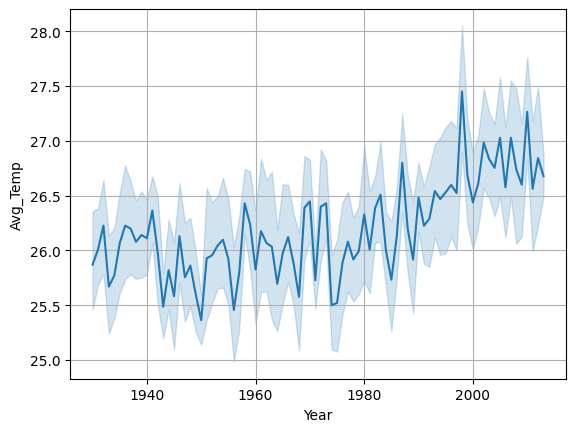

In [26]:
plt.Figure(figsize=(9,4))
sns.lineplot(x='Year',y='Avg_Temp',data=df_Brz_data)
plt.grid(True)
plt.show()

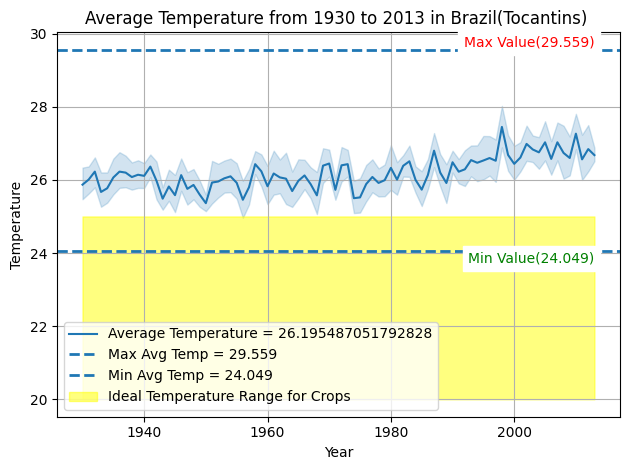

In [38]:
max_temp_brz=df_Brz_data['Avg_Temp'].max()
min_temp_brz=df_Brz_data['Avg_Temp'].min()

sns.lineplot(x='Year',y='Avg_Temp',data=df_Brz_data,alpha=1.0,label=f"Average Temperature = {df_Brz_data['Avg_Temp'].mean()}")

plt.axhline(y=max_temp_brz, linestyle = '--', linewidth = 2,label =f'Max Avg Temp = {max_temp_brz} ')
plt.axhline(y=min_temp_brz, linestyle = '--', linewidth = 2 , label = f'Min Avg Temp = {min_temp_brz}')

plt.text(
    x=df_Brz_data['Year'].max(),
    y=max_temp_brz,
    s=f'Max Value({max_temp_brz})',
    color='red',
    va='bottom',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
    
    
)
plt.text(
    x=df_Brz_data['Year'].max(),
    y=min_temp_brz,
    s=f'Min Value({min_temp_brz})',
    color='green',
    va='top',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
    
)

plt.fill_between(df_Brz_data['Year'],20,25,color='yellow', alpha = 0.5 ,label='Ideal Temperature Range for Crops')

plt.title("Average Temperature from 1930 to 2013 in Brazil(Tocantins) ")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(loc='lower left')


plt.tight_layout()
plt.grid(True)
plt.show()





In [28]:
df_ind_data=df_new[(df_new['Country'] == 'India')]
df_ind_data.head(n=100)

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
24709,26.534,1.904,Andaman And Nicobar,India,1796,1,1
24710,26.294,1.122,Andaman And Nicobar,India,1796,2,1
24711,26.180,1.959,Andaman And Nicobar,India,1796,3,1
24712,27.942,1.281,Andaman And Nicobar,India,1796,4,1
24713,28.651,1.119,Andaman And Nicobar,India,1796,5,1
...,...,...,...,...,...,...,...
24804,26.226,2.089,Andaman And Nicobar,India,1803,12,1
24805,26.768,3.172,Andaman And Nicobar,India,1804,1,1
24806,26.057,1.374,Andaman And Nicobar,India,1804,2,1
24807,27.066,2.841,Andaman And Nicobar,India,1804,3,1


In [29]:
df_ind_data['State']=='West Bengal'

24709     False
24710     False
24711     False
24712     False
24713     False
          ...  
615157     True
615158     True
615159     True
615160     True
615161     True
Name: State, Length: 86664, dtype: bool

In [30]:
df_ind_data=df_ind_data[(df_ind_data['State']=='West Bengal')]    
df_ind_data

#West Bengal is a suitable state for 
# climate change policy analysis and
# implementation because of its diverse 
# climate, geography, and agriculture, and 
# its vulnerability to climate change impacts

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
612549,17.763,2.102,West Bengal,India,1796,1,1
612550,20.298,1.448,West Bengal,India,1796,2,1
612551,23.680,2.142,West Bengal,India,1796,3,1
612552,27.854,1.573,West Bengal,India,1796,4,1
612553,29.626,1.448,West Bengal,India,1796,5,1
...,...,...,...,...,...,...,...
615157,29.694,0.270,West Bengal,India,2013,5,1
615158,29.628,0.465,West Bengal,India,2013,6,1
615159,29.115,0.359,West Bengal,India,2013,7,1
615160,28.686,0.304,West Bengal,India,2013,8,1


In [31]:
df_ind_data['Avg_Temp'].agg(max)

31.165

In [32]:
df_ind_data['Avg_Temp'].agg(vars)

{'_is_copy': <weakref at 0x0000028AE4336340; dead>,
 '_mgr': SingleBlockManager
 Items: Index([612549, 612550, 612551, 612552, 612553, 612554, 612555, 612556, 612557,
        612558,
        ...
        615152, 615153, 615154, 615155, 615156, 615157, 615158, 615159, 615160,
        615161],
       dtype='int64', length=2613)
 NumpyBlock: 2613 dtype: float64,
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>,
 '_name': 'Avg_Temp',
 '_cacher': ('Avg_Temp',
  <weakref at 0x0000028AE4379080; to 'DataFrame' at 0x0000028AE4290B90>)}

In [33]:
df_ind_data['Avg_Temp'].mean()

24.915778789077958

In [34]:
df_ind_data=df_ind_data[(df_ind_data['Year']) >= 1930 ]
df_ind_data.head(10)

,Avg_Temp,Confidence_interval_temp,State,Country,Year,Month,Day
614157,16.665,0.323,West Bengal,India,1930,1,1
614158,20.017,0.356,West Bengal,India,1930,2,1
614159,25.219,0.443,West Bengal,India,1930,3,1
614160,28.177,0.382,West Bengal,India,1930,4,1
614161,29.376,0.306,West Bengal,India,1930,5,1
614162,29.022,0.323,West Bengal,India,1930,6,1
614163,28.196,0.265,West Bengal,India,1930,7,1
614164,27.975,0.154,West Bengal,India,1930,8,1
614165,27.952,0.148,West Bengal,India,1930,9,1
614166,26.355,0.316,West Bengal,India,1930,10,1


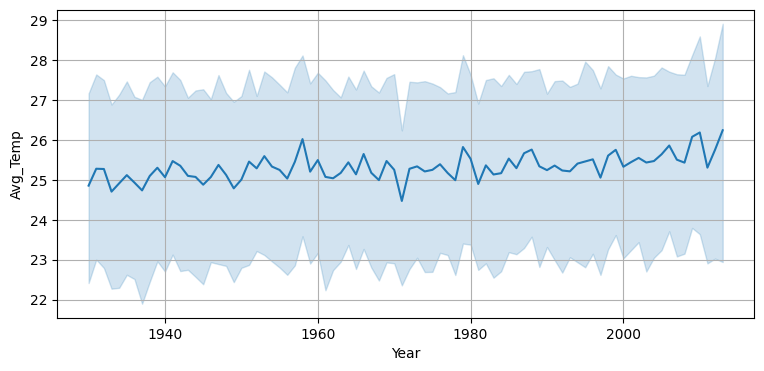

In [35]:
plt.figure(figsize=(9,4))
sns.lineplot(x='Year',y='Avg_Temp', data=df_ind_data,alpha=1.0)
plt.grid(True)
plt.show()

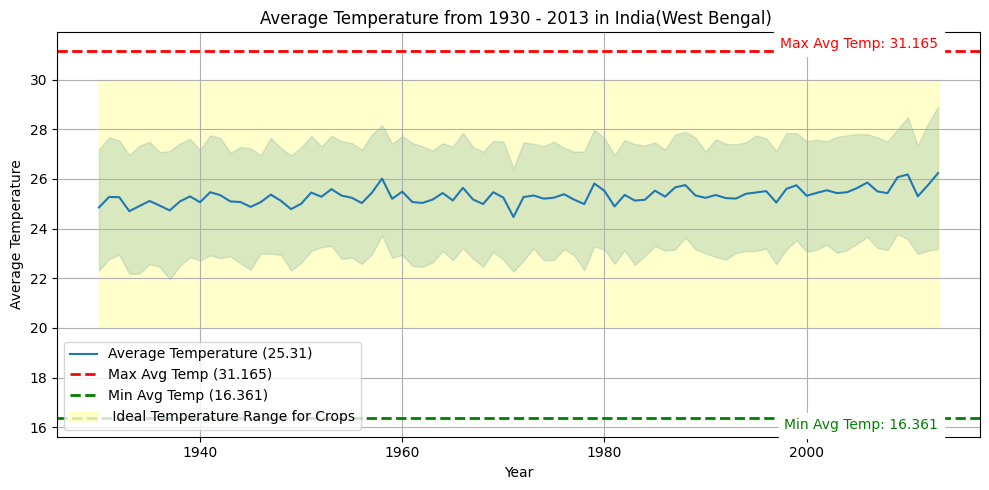

In [36]:


max_value = df_ind_data['Avg_Temp'].max()
min_value = df_ind_data['Avg_Temp'].min()

plt.figure(figsize=(10,5))


sns.lineplot(x='Year', y='Avg_Temp', data=df_ind_data, alpha=1.0, label=f'Average Temperature ({df_ind_data["Avg_Temp"].mean():.2f})')


plt.axhline(y=max_value, color='red', linestyle='--', linewidth=2, label=f'Max Avg Temp ({max_value})')
plt.axhline(y=min_value, color='green', linestyle='--', linewidth=2, label=f'Min Avg Temp ({min_value})')


plt.text(
    x=df_ind_data['Year'].max(),
    y=max_value,
    s=f'Max Avg Temp: {max_value}',
    color='red',
    va='bottom',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
)


plt.text(
    x=df_ind_data['Year'].max(),
    y=min_value,
    s=f'Min Avg Temp: {min_value}',
    color='green',
    va='top',
    ha='right',
    fontsize=10,
    backgroundcolor='white'
)

plt.fill_between(df_ind_data['Year'],20,30,color='yellow',alpha=0.2,label=" Ideal Temperature Range for Crops")

plt.title('Average Temperature from 1930 - 2013 in India(West Bengal) ')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend(loc='lower left')


plt.tight_layout()
plt.grid(True)
plt.show()

